# importing the dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# data collection and preprocessing

In [2]:
# loading the data from csv file to pandas dataframe
insurance_dataset = pd.read_csv('insurance.csv')

In [3]:
# first 5 rows of the dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns 
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# cheaking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# some data analysis

In [7]:
# some statistical measures
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/home/absurd/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


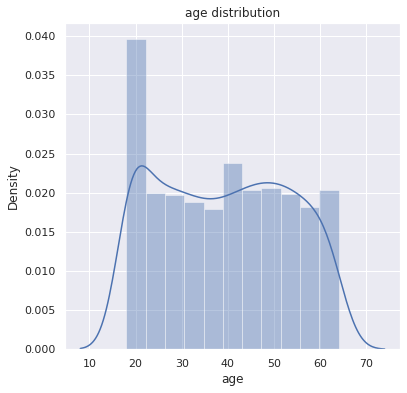

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()

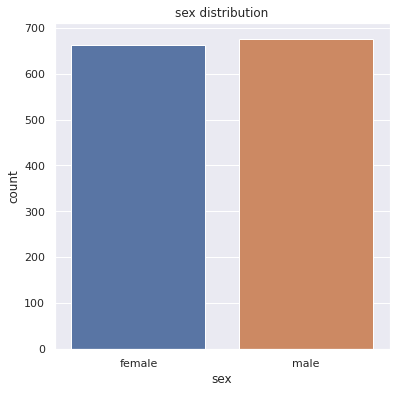

In [9]:
# gender column 
plt.figure(figsize=(6.,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/home/absurd/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


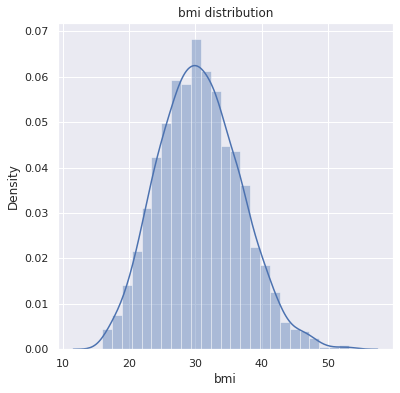

In [11]:
# bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

In [12]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

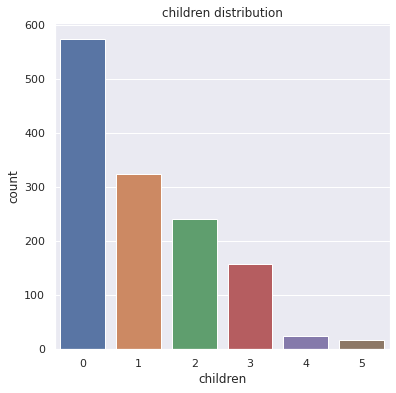

In [13]:
# children column
plt.figure(figsize=(6.,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children distribution')
plt.show()

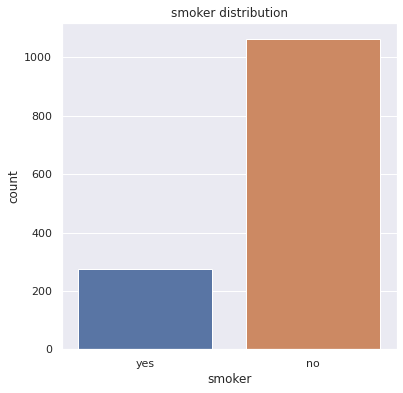

In [14]:
# smoker column
plt.figure(figsize=(6.,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker distribution')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

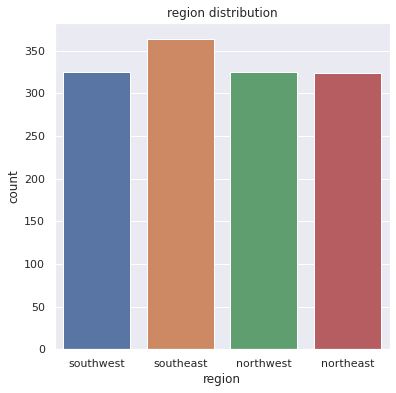

In [16]:
# region column
plt.figure(figsize=(6.,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region distribution')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/home/absurd/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


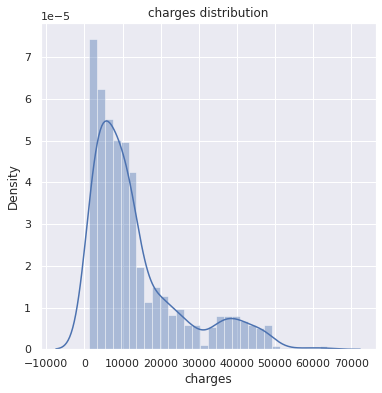

In [18]:
# charges distribution

plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()

# encoding the categorical features

In [19]:
# encoding the sex column
insurance_dataset.replace({'sex':{'male':0 , 'female':1}},inplace=True)

#encoding the smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#encoding the region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

# splitting the feature and target

In [20]:
x = insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges']


In [21]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# splitting the data into training and test data

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=2)

In [23]:
print(x.shape , x_train.shape , x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# model training 

## linear regression

In [24]:
# loading the model
regressor = LinearRegression()

In [25]:
regressor.fit(x_train,y_train)

LinearRegression()

# model evaluation

In [26]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

In [27]:
# r squared error
r2_train = metrics.r2_score(y_train, training_data_prediction)

print('r squared :', r2_train)

r squared : 0.751505643411174


In [28]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [29]:
# r squared error
r2_test = metrics.r2_score(y_test, test_data_prediction)

print('r squared :', r2_train)

r squared : 0.751505643411174


# building a prediction system

In [30]:
input_data = (31,1,25.74,0,1,0,)

# changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshape)

print(prediction)

[3760.0805765]


/home/absurd/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
